In [281]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [282]:
image = Image.open('ABC.JPG')

In [283]:
array = np.array(image)

In [284]:
print(array.shape)

(583, 875, 3)


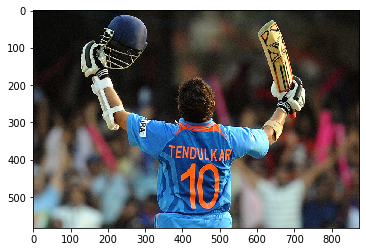

In [285]:
plt.imshow(array)

In [286]:
#Separating R,G & B channels
img_red = array[:,:,0]
img_green = array[:,:,1]
img_blue = array[:,:,2]

In [329]:
def func(Mat,pc):
    #calculate the mean
    Mean = np.mean(Mat,axis = 0)
    #print(Mean)
    #Subtract the mean from the input obtain the mean-shifted image matix
    Centre = Mat - Mean
    #print(Centre.shape)
    Cov_mat = np.cov(Centre)
    #print(Cov_mat.shape)
    e,v = np.linalg.eigh(Cov_mat)
    #print(e)
    #print(v)
    #pc = 5
    index = np.argsort(e, order=None)[::-1][:pc]
    #print(index)
    evec = v[:,index]
    #print(v)
    #print(e)
    evals = e[index]
    #print(e)
    #print(evec.shape)
    #Project the mean-shifted matrix into the eigenspace using the retained eigenvectors
    mat1 = evec.T.dot(Centre)
    #print(mat1.shape)
    img_new = evec.dot(mat1)+Mean
    return img_new

In [330]:
#Selecting number of Principle components
pc = 125
array_r=func(img_red,pc)

In [331]:
array_g = func(img_green,pc)

In [332]:
array_b = func(img_blue,pc)

In [333]:
img_r=Image.fromarray(array_r,mode=None)
img_g=Image.fromarray(array_g,mode=None)
img_b=Image.fromarray(array_b,mode=None)

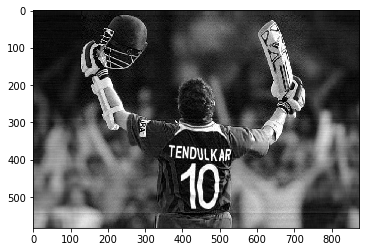

In [334]:
#Reconstructed Green channel image
plt.imshow(img_r)


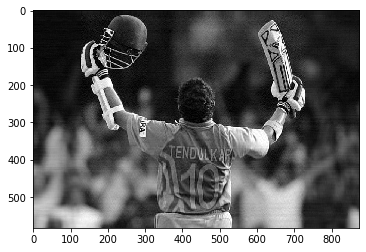

In [335]:
#Reconstructed Green channel image
plt.imshow(img_g)

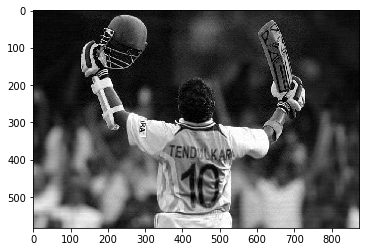

In [336]:
#Reconstructed Blue channel image
plt.imshow(img_b)

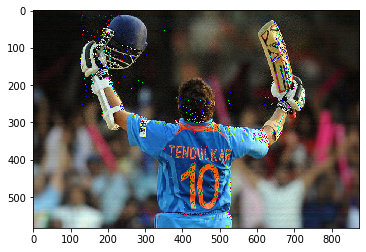

In [337]:
#initializing a zero matrix of original image dimension 
rgbArray = np.zeros((array.shape[0],array.shape[1],3), 'uint8')
#converting R,G & B arrays with double values to int values
rgbArray[..., 0] = array_r.astype(int)
rgbArray[..., 1] = array_g.astype(int)
rgbArray[..., 2] = array_b.astype(int)
#recreating the image from PCA
img = Image.fromarray(rgbArray)
img.save("ABC_{}.jpg".format(pc))
plt.imshow(img)

In [338]:
import os
Original_fsize = os.path.getsize("ABC.jpg")
Compressed_fsize = os.path.getsize("ABC_{}.jpg".format(pc))
Compression_ratio = ((Original_fsize - Compressed_fsize)/Original_fsize)
print("Compression_ratio: {}".format((Compression_ratio*100)))

Compression_ratio: 59.676354486483994
